# import necessary modules



In [372]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
import time

## Importing the data set



In [769]:
data = pd.read_csv('/Users/macbook/Desktop/MÉMOIRE/dataset/Police_Department_Incident.csv')
data.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,150060275,NON-CRIMINAL,LOST PROPERTY,Monday,01/19/2015,14:00,MISSION,NONE,18TH ST / VALENCIA ST,-122.421582,37.761701,"(37.7617007179518, -122.42158168137)",15006027571000
1,150098210,ROBBERY,"ROBBERY, BODILY FORCE",Sunday,02/01/2015,15:45,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406,37.784191,"(37.7841907151119, -122.414406029855)",15009821003074
2,150098210,ASSAULT,AGGRAVATED ASSAULT WITH BODILY FORCE,Sunday,02/01/2015,15:45,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406,37.784191,"(37.7841907151119, -122.414406029855)",15009821004014
3,150098210,SECONDARY CODES,DOMESTIC VIOLENCE,Sunday,02/01/2015,15:45,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406,37.784191,"(37.7841907151119, -122.414406029855)",15009821015200
4,150098226,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",Tuesday,01/27/2015,19:00,NORTHERN,NONE,LOMBARD ST / LAGUNA ST,-122.431119,37.800469,"(37.8004687042875, -122.431118543788)",15009822628160


# Data Exploration : understanding the data  what looks like,
## Returns the shape of the data frame in the form of a tuple (no. of rows, no. of cols).



In [3]:
data.shape

(2215024, 13)

In [9]:
data.columns

Index(['IncidntNum', 'Category', 'Descript', 'DayOfWeek', 'Date', 'Time',
       'PdDistrict', 'Resolution', 'Address', 'X', 'Y', 'Location', 'PdId'],
      dtype='object')

## using the dtypes() method to display the different datatypes available



In [4]:
data.dtypes

IncidntNum      int64
Category       object
Descript       object
DayOfWeek      object
Date           object
Time           object
PdDistrict     object
Resolution     object
Address        object
X             float64
Y             float64
Location       object
PdId            int64
dtype: object

## Return a Series containing counts of unique values.



In [5]:
data.Category.value_counts()

LARCENY/THEFT                  480448
OTHER OFFENSES                 309358
NON-CRIMINAL                   238323
ASSAULT                        194694
VEHICLE THEFT                  126602
DRUG/NARCOTIC                  119628
VANDALISM                      116059
WARRANTS                       101379
BURGLARY                        91543
SUSPICIOUS OCC                  80444
MISSING PERSON                  64961
ROBBERY                         55867
FRAUD                           41542
SECONDARY CODES                 25831
FORGERY/COUNTERFEITING          23050
WEAPON LAWS                     22234
TRESPASS                        19449
PROSTITUTION                    16701
STOLEN PROPERTY                 11891
SEX OFFENSES, FORCIBLE          11742
DISORDERLY CONDUCT              10040
DRUNKENNESS                      9826
RECOVERED VEHICLE                8716
DRIVING UNDER THE INFLUENCE      5672
KIDNAPPING                       5346
RUNAWAY                          4440
LIQUOR LAWS 

## Print a concise summary of a DataFrame.



In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2215024 entries, 0 to 2215023
Data columns (total 13 columns):
IncidntNum    int64
Category      object
Descript      object
DayOfWeek     object
Date          object
Time          object
PdDistrict    object
Resolution    object
Address       object
X             float64
Y             float64
Location      object
PdId          int64
dtypes: float64(2), int64(2), object(9)
memory usage: 219.7+ MB


## force pandas to calculate the true memory usage



In [8]:
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2215024 entries, 0 to 2215023
Data columns (total 13 columns):
IncidntNum    int64
Category      object
Descript      object
DayOfWeek     object
Date          object
Time          object
PdDistrict    object
Resolution    object
Address       object
X             float64
Y             float64
Location      object
PdId          int64
dtypes: float64(2), int64(2), object(9)
memory usage: 1.4 GB


# *Data cleaning*

##### prepare the data: searching for missing values and duplicated values:





###### 1.searching for missing values:



In [770]:
data.isna().sum()

IncidntNum    0
Category      0
Descript      0
DayOfWeek     0
Date          0
Time          0
PdDistrict    1
Resolution    0
Address       0
X             0
Y             0
Location      0
PdId          0
dtype: int64

###### make clearly the missing values in PdDisrict



In [584]:
data[data.PdDistrict.isna()]

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
2013150,166018573,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,01/17/2016,23:54,NaN,NONE,100 Block of VELASCO AV,-122.413352,37.708202,"(37.70820245849022, -122.4133519852842)",16601857306244


###### dealing with the missing values : drop it or fill it (i ll fill it with "unknown"):



In [771]:
#inplace=true to make changes in the underlying data
data.PdDistrict.fillna(value = "UNKNOWN" , inplace= True)

###### check the missing values



In [13]:
data.isna().sum()
#there is no missing values

IncidntNum    0
Category      0
Descript      0
DayOfWeek     0
Date          0
Time          0
PdDistrict    0
Resolution    0
Address       0
X             0
Y             0
Location      0
PdId          0
dtype: int64

###### check for the duplicated values;  by default use all of the columns



In [14]:
# count the duplicate rows
data.duplicated().sum()
#So all rows are deferents between each other

0

###### show the ouliers


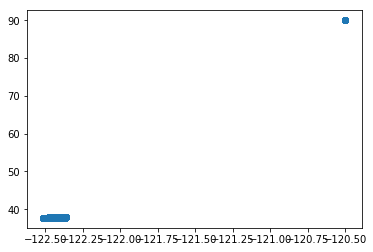

In [15]:
plt.scatter(x=data['X'], y=data['Y'])
plt.show()

###### filter the longitude and latitude coordinates and drop the outliers(long=-120.5 and lat =90)
###### Geographic coordinates of San Francisco, California, USA





In [772]:

data[(data.X > -122.3649) & (data.Y > 37.81998)]

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
231423,50908404,VEHICLE THEFT,"VEHICLE, RECOVERED, AUTO",Saturday,08/13/2005,17:00,TENDERLOIN,NONE,JENNINGS CT / INGALLS ST,-120.5,90.0,"(90, -120.5)",5090840407041
247512,40975300,OTHER OFFENSES,"DRIVERS LICENSE, SUSPENDED OR REVOKED",Thursday,08/26/2004,13:35,INGLESIDE,"ARREST, CITED",JAMES LICK FREEWAY HY / CESAR CHAVEZ ST,-120.5,90.0,"(90, -120.5)",4097530065016
269974,30932887,WARRANTS,ENROUTE TO OUTSIDE JURISDICTION,Thursday,08/07/2003,15:45,NORTHERN,"ARREST, BOOKED",LARKIN ST / AUSTIN ST,-120.5,90.0,"(90, -120.5)",3093288762050
290301,51104126,WARRANTS,ENROUTE TO DEPARTMENT OF CORRECTIONS,Friday,09/30/2005,23:01,NORTHERN,"ARREST, BOOKED",AUSTIN ST / LARKIN ST,-120.5,90.0,"(90, -120.5)",5110412662020
312643,50978388,OTHER OFFENSES,PROBATION VIOLATION,Tuesday,08/30/2005,20:15,TENDERLOIN,"ARREST, BOOKED",MCALLISTER ST / 7THSTNORTH ST,-120.5,90.0,"(90, -120.5)",5097838826170
319711,40471110,ASSAULT,BATTERY,Saturday,04/24/2004,23:20,BAYVIEW,NONE,JAMES LICK FREEWAY HY / SILVER AV,-120.5,90.0,"(90, -120.5)",4047111004134
331495,51198260,DRUG/NARCOTIC,POSSESSION OF MARIJUANA,Monday,10/24/2005,00:03,TENDERLOIN,"ARREST, CITED",OFARRELL ST / 5THSTNORTH ST,-120.5,90.0,"(90, -120.5)",5119826016010
334751,50572015,ROBBERY,ROBBERY ON THE STREET WITH A GUN,Monday,05/23/2005,02:00,CENTRAL,NONE,ELLICK LN / CALIFORNIA ST,-120.5,90.0,"(90, -120.5)",5057201503011
361446,51425831,OTHER OFFENSES,RESISTING ARREST,Tuesday,12/20/2005,14:57,TENDERLOIN,"ARREST, BOOKED",7THSTNORTH ST / MCALLISTER ST,-120.5,90.0,"(90, -120.5)",5142583127170
361707,40753980,OTHER OFFENSES,RECKLESS DRIVING,Friday,07/02/2004,13:43,BAYVIEW,NONE,I-280 / CESAR CHAVEZ ST,-120.5,90.0,"(90, -120.5)",4075398065020


In [31]:
data.shape

(2215024, 13)

In [773]:
data.drop(data[(data.X > -122.3649) & (data.Y > 37.81998)].index , inplace=True)

###### number of outliers : 2215024- 2214879=145



In [73]:
data.shape

(2214879, 13)

# Data Reduction



###### we dont need RECOVERED VEHICLE, SECONDARY CODES, NON-CRIMINAL because it is not a kinda crime that we wanna predict in futur


In [84]:
data[data.Category == 'RECOVERED VEHICLE'].shape

(8716, 13)

In [419]:
data.shape

(2215024, 13)

In [774]:
 data.drop( data[ data['Category'] == "RECOVERED VEHICLE"].index , inplace=True)

In [416]:
data.shape

(2206308, 13)

In [775]:
 data.drop( data[ data['Category'] == "SECONDARY CODES"].index , inplace=True)

In [425]:
data.shape

(2189049, 13)

In [776]:
 data.drop( data[ data['Category'] == "NON-CRIMINAL"].index , inplace=True)

In [590]:
data.shape

(1942154, 13)

## Combining Similar Categories 

In [777]:
#TREA and TRESPASS have same Descript so we combine them
data[data['Category'] == "TREA"]

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
824,150105285,TREA,TRESPASSING OR LOITERING NEAR POSTED INDUSTRIA...,Tuesday,02/03/2015,17:05,BAYVIEW,NONE,300 Block of 20TH ST,-122.386105,37.760692,"(37.760692489996, -122.386104938274)",15010528527197
158799,140140508,TREA,TRESPASSING OR LOITERING NEAR POSTED INDUSTRIA...,Monday,02/17/2014,06:38,MISSION,"ARREST, BOOKED",500 Block of CASTRO ST,-122.434995,37.760070,"(37.7600697106567, -122.434994783089)",14014050827197
440687,130209885,TREA,TRESPASSING OR LOITERING NEAR POSTED INDUSTRIA...,Wednesday,03/13/2013,12:15,SOUTHERN,"ARREST, CITED",STOCKTON ST / ELLIS ST,-122.405832,37.785745,"(37.7857446545609, -122.405832474482)",13020988527197
909810,130458612,TREA,TRESPASSING OR LOITERING NEAR POSTED INDUSTRIA...,Monday,06/03/2013,19:20,TARAVAL,"ARREST, BOOKED",20TH AV / VICENTE ST,-122.476485,37.739276,"(37.7392758608084, -122.476484757052)",13045861227197
1007212,121014679,TREA,TRESPASSING OR LOITERING NEAR POSTED INDUSTRIA...,Monday,12/17/2012,10:00,CENTRAL,"ARREST, BOOKED",100 Block of BAY ST,-122.408337,37.806222,"(37.8062216124785, -122.408337388509)",12101467927197
1068716,101200490,TREA,TRESPASSING OR LOITERING NEAR POSTED INDUSTRIA...,Friday,12/31/2010,16:20,CENTRAL,"ARREST, BOOKED",2300 Block of STOCKTON ST,-122.410661,37.807428,"(37.8074277511648, -122.410661460251)",10120049027197
1195484,120847097,TREA,TRESPASSING OR LOITERING NEAR POSTED INDUSTRIA...,Saturday,10/20/2012,22:27,BAYVIEW,NONE,1300 Block of ARMSTRONG AV,-122.387620,37.723535,"(37.7235354411728, -122.387620053793)",12084709727197
1444646,130665497,TREA,TRESPASSING OR LOITERING NEAR POSTED INDUSTRIA...,Monday,08/12/2013,02:26,TARAVAL,"ARREST, CITED",0 Block of WESTPORTAL AV,-122.466295,37.740214,"(37.740214312179, -122.466294804656)",13066549727197
1489649,131010924,TREA,TRESPASSING OR LOITERING NEAR POSTED INDUSTRIA...,Saturday,11/30/2013,05:59,NORTHERN,"ARREST, BOOKED",700 Block of POLK ST,-122.419250,37.783807,"(37.7838069204559, -122.41925042197)",13101092427197
1701956,100833668,TREA,TRESPASSING OR LOITERING NEAR POSTED INDUSTRIA...,Thursday,09/09/2010,11:55,BAYVIEW,NONE,1000 Block of IOWA ST,-122.391708,37.753872,"(37.7538716329607, -122.391708193948)",10083366827197


In [430]:
data.Category.value_counts()

LARCENY/THEFT                  480419
OTHER OFFENSES                 309319
ASSAULT                        194685
VEHICLE THEFT                  126587
DRUG/NARCOTIC                  119621
VANDALISM                      116058
WARRANTS                       101365
BURGLARY                        91542
SUSPICIOUS OCC                  80441
MISSING PERSON                  64961
ROBBERY                         55864
FRAUD                           41540
FORGERY/COUNTERFEITING          23050
WEAPON LAWS                     22233
TRESPASS                        19447
PROSTITUTION                    16699
STOLEN PROPERTY                 11889
SEX OFFENSES, FORCIBLE          11741
DISORDERLY CONDUCT              10038
DRUNKENNESS                      9826
RECOVERED VEHICLE                8716
DRIVING UNDER THE INFLUENCE      5672
KIDNAPPING                       5345
RUNAWAY                          4440
LIQUOR LAWS                      4083
ARSON                            3931
EMBEZZLEMENT

In [778]:
data.replace("TREA" , "TRESPASS", inplace = True)

In [450]:
data.Category.value_counts()

LARCENY/THEFT                  480448
OTHER OFFENSES                 309358
NON-CRIMINAL                   238323
ASSAULT                        194694
VEHICLE THEFT                  126602
DRUG/NARCOTIC                  119628
VANDALISM                      116059
WARRANTS                       101379
BURGLARY                        91543
SUSPICIOUS OCC                  80444
MISSING PERSON                  64961
ROBBERY                         55867
FRAUD                           41542
SECONDARY CODES                 25831
FORGERY/COUNTERFEITING          23050
WEAPON LAWS                     22234
TRESPASS                        19463
PROSTITUTION                    16701
STOLEN PROPERTY                 11891
SEX OFFENSES, FORCIBLE          11742
DISORDERLY CONDUCT              10040
DRUNKENNESS                      9826
RECOVERED VEHICLE                8716
DRIVING UNDER THE INFLUENCE      5672
KIDNAPPING                       5346
RUNAWAY                          4440
LIQUOR LAWS 

In [454]:
data[data['Category'] == "DISORDERLY CONDUCT"]

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId


In [455]:
data[data['Category'] == "PORNOGRAPHY/OBSCENE MAT"]

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
172,150099569,PORNOGRAPHY/OBSCENE MAT,DISTURBING THE PEACE,Monday,02/02/2015,02:25,INGLESIDE,"ARREST, BOOKED",2900 Block of DIAMOND ST,-122.434364,37.733045,"(37.7330448919252, -122.434363909417)",15009956919022
688,150104077,PORNOGRAPHY/OBSCENE MAT,COMMITTING PUBLIC NUISANCE,Tuesday,02/03/2015,11:49,CENTRAL,"ARREST, BOOKED",FILBERT ST / STOCKTON ST,-122.409373,37.801369,"(37.8013694186977, -122.409373489901)",15010407719010
1069,150107322,PORNOGRAPHY/OBSCENE MAT,"DISTURBING THE PEACE, COMMOTION",Wednesday,02/04/2015,11:10,SOUTHERN,NONE,800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",15010732219020
1078,150107441,PORNOGRAPHY/OBSCENE MAT,COMMITTING PUBLIC NUISANCE,Wednesday,02/04/2015,12:23,CENTRAL,"ARREST, BOOKED",600 Block of FILBERT ST,-122.410199,37.801214,"(37.8012139881945, -122.410199135855)",15010744119010
1155,150108217,PORNOGRAPHY/OBSCENE MAT,DISTURBING THE PEACE,Wednesday,02/04/2015,15:15,MISSION,"ARREST, BOOKED",1000 Block of POTRERO AV,-122.406539,37.756486,"(37.7564864109309, -122.406539115148)",15010821719022
1453,150110682,PORNOGRAPHY/OBSCENE MAT,"DISTURBING THE PEACE, COMMOTION",Thursday,02/05/2015,10:23,MISSION,"ARREST, BOOKED",1000 Block of POTRERO AV,-122.406539,37.756486,"(37.7564864109309, -122.406539115148)",15011068219020
1693,150112967,PORNOGRAPHY/OBSCENE MAT,DISTURBING THE PEACE,Thursday,02/05/2015,21:44,INGLESIDE,"ARREST, BOOKED",0 Block of REGENT ST,-122.456408,37.709692,"(37.709691756097, -122.456407784485)",15011296719022
1821,150114026,PORNOGRAPHY/OBSCENE MAT,COMMITTING PUBLIC NUISANCE,Friday,02/06/2015,11:45,SOUTHERN,NONE,MARKET ST / 5TH ST,-122.408068,37.783992,"(37.7839916768161, -122.408068345148)",15011402619010
2056,150116226,PORNOGRAPHY/OBSCENE MAT,DISTURBING THE PEACE,Saturday,02/07/2015,06:15,PARK,"ARREST, BOOKED",1500 Block of HAIGHT ST,-122.447761,37.769846,"(37.7698464875415, -122.44776112232)",15011622619022
2304,150118523,PORNOGRAPHY/OBSCENE MAT,DISTURBING THE PEACE,Saturday,02/07/2015,23:22,INGLESIDE,"ARREST, BOOKED",100 Block of RAE AV,-122.449432,37.711088,"(37.711088010346, -122.449432129812)",15011852319022


In [779]:
data.replace("DISORDERLY CONDUCT" , "PORNOGRAPHY/OBSCENE MAT", inplace= True)

In [453]:
data.Category.value_counts()

LARCENY/THEFT                  480448
OTHER OFFENSES                 309358
NON-CRIMINAL                   238323
ASSAULT                        194694
VEHICLE THEFT                  126602
DRUG/NARCOTIC                  119628
VANDALISM                      116059
WARRANTS                       101379
BURGLARY                        91543
SUSPICIOUS OCC                  80444
MISSING PERSON                  64961
ROBBERY                         55867
FRAUD                           41542
SECONDARY CODES                 25831
FORGERY/COUNTERFEITING          23050
WEAPON LAWS                     22234
TRESPASS                        19463
PROSTITUTION                    16701
STOLEN PROPERTY                 11891
SEX OFFENSES, FORCIBLE          11742
PORNOGRAPHY/OBSCENE MAT         10099
DRUNKENNESS                      9826
RECOVERED VEHICLE                8716
DRIVING UNDER THE INFLUENCE      5672
KIDNAPPING                       5346
RUNAWAY                          4440
LIQUOR LAWS 

In [456]:
data[data.Category == 'BAD CHECKS']

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
804,150105069,BAD CHECKS,"CHECKS, NON-SUFFICIENT FUNDS (MISDEMEANOR)",Monday,02/02/2015,19:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",15010506909030
6750,150157640,BAD CHECKS,"CHECKS, NON-SUFFICIENT FUNDS (MISDEMEANOR)",Thursday,02/05/2015,08:00,INGLESIDE,NONE,400 Block of TERESITA BL,-122.446784,37.739641,"(37.739640900564, -122.446784368926)",15015764009030
7109,150160778,BAD CHECKS,"CHECKS, NON-SUFFICIENT FUNDS (MISDEMEANOR)",Wednesday,01/28/2015,16:05,SOUTHERN,NONE,0 Block of NEWMONTGOMERY ST,-122.401738,37.788534,"(37.7885335775983, -122.401738283506)",15016077809030
21514,140062918,BAD CHECKS,"CHECKS, NON-SUFFICIENT FUNDS (MISDEMEANOR)",Wednesday,01/08/2014,11:00,NORTHERN,NONE,GOLDEN GATE AV / POLK ST,-122.418810,37.781235,"(37.78123525699, -122.418809581375)",14006291809030
27313,140230046,BAD CHECKS,"CHECKS, NON-SUFFICIENT FUNDS (MISDEMEANOR)",Tuesday,03/11/2014,13:00,SOUTHERN,NONE,MARKET ST / VANNESS AV,-122.419258,37.775146,"(37.7751462916539, -122.419257894814)",14023004609030
34412,140432117,BAD CHECKS,"CHECKS, NON-SUFFICIENT FUNDS (MISDEMEANOR)",Friday,05/16/2014,08:00,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",14043211709030
52491,140925651,BAD CHECKS,"CHECKS, NON-SUFFICIENT FUNDS (MISDEMEANOR)",Sunday,10/26/2014,12:30,MISSION,NONE,16TH ST / VALENCIA ST,-122.421886,37.764918,"(37.7649178909424, -122.421886357981)",14092565109030
60068,150092892,BAD CHECKS,"CHECKS, NON-SUFFICIENT FUNDS (MISDEMEANOR)",Monday,01/12/2015,19:00,RICHMOND,NONE,1900 Block of BRODERICK ST,-122.442137,37.788336,"(37.7883357700623, -122.442136897772)",15009289209030
80743,140254858,BAD CHECKS,"CHECKS, NON-SUFFICIENT FUNDS (MISDEMEANOR)",Friday,03/14/2014,13:00,TARAVAL,NONE,1600 Block of 47TH AV,-122.506601,37.755700,"(37.755699985061, -122.506600662036)",14025485809030
87037,140325932,BAD CHECKS,"CHECKS, NON-SUFFICIENT FUNDS (MISDEMEANOR)",Monday,04/07/2014,21:00,TARAVAL,NONE,300 Block of HEAD ST,-122.464463,37.713614,"(37.7136138852153, -122.464462764733)",14032593209030


In [458]:
data[data.Category == 'EMBEZZLEMENT ']

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId


In [780]:
data.replace("BAD CHECKS" , "Fraud/Counterfeiting", inplace= True)

In [781]:
data.replace("EMBEZZLEMENT" , "Fraud/Counterfeiting", inplace= True)

In [468]:
data.Category.value_counts()

LARCENY/THEFT                  480448
OTHER OFFENSES                 309358
NON-CRIMINAL                   238323
ASSAULT                        194694
VEHICLE THEFT                  126602
ARSON                          119990
DRUG/NARCOTIC                  119628
WARRANTS                       101379
BURGLARY                        91543
SUSPICIOUS OCC                  80444
MISSING PERSON                  64961
ROBBERY                         55867
FRAUD                           41542
SECONDARY CODES                 25831
FORGERY/COUNTERFEITING          23050
WEAPON LAWS                     22234
TRESPASS                        19463
PROSTITUTION                    16701
STOLEN PROPERTY                 11891
SEX OFFENSES, FORCIBLE          11742
PORNOGRAPHY/OBSCENE MAT         10099
DRUNKENNESS                      9826
RECOVERED VEHICLE                8716
DRIVING UNDER THE INFLUENCE      5672
KIDNAPPING                       5346
RUNAWAY                          4440
LIQUOR LAWS 

In [782]:
data.replace("VANDALISM" , "ARSON", inplace = True)

In [478]:
data.Category.value_counts()

LARCENY/THEFT                  480448
OTHER OFFENSES                 309358
ASSAULT                        194694
VEHICLE THEFT                  126602
ARSON                          119990
DRUG/NARCOTIC                  119628
WARRANTS                       101379
BURGLARY                        91543
SUSPICIOUS OCC                  80444
MISSING PERSON                  64961
ROBBERY                         55867
FRAUD                           41542
FORGERY/COUNTERFEITING          23050
WEAPON LAWS                     22234
TRESPASS                        19463
PROSTITUTION                    16701
STOLEN PROPERTY                 11891
SEX OFFENSES, FORCIBLE          11742
PORNOGRAPHY/OBSCENE MAT         10099
DRUNKENNESS                      9826
DRIVING UNDER THE INFLUENCE      5672
KIDNAPPING                       5346
RUNAWAY                          4440
LIQUOR LAWS                      4083
Fraud/Counterfeiting             3913
LOITERING                        2430
SUICIDE     

In [727]:
data.Descript.value_counts()

GRAND THEFT FROM LOCKED AUTO                              178836
BATTERY                                                    67654
STOLEN AUTOMOBILE                                          64763
DRIVERS LICENSE, SUSPENDED OR REVOKED                      62534
WARRANT ARREST                                             56230
SUSPICIOUS OCCURRENCE                                      52490
PETTY THEFT FROM LOCKED AUTO                               51946
PETTY THEFT OF PROPERTY                                    46114
MALICIOUS MISCHIEF, VANDALISM                              45238
MALICIOUS MISCHIEF, VANDALISM OF VEHICLES                  44290
TRAFFIC VIOLATION                                          38105
THREATS AGAINST LIFE                                       34670
GRAND THEFT OF PROPERTY                                    29420
ENROUTE TO OUTSIDE JURISDICTION                            29104
PETTY THEFT FROM A BUILDING                                25728
FOUND PERSON             

In [783]:
idx = data[data['Category'] == 'SEX OFFENSES, NON FORCIBLE'].index


In [598]:
idx

Int64Index([   4910,    8353,    9817,   21995,   47526,   84737,   85331,
              85529,   85900,   87407,
            ...
            2174437, 2176177, 2178243, 2180290, 2187030, 2187633, 2190973,
            2195234, 2207316, 2214302],
           dtype='int64', length=431)

In [784]:
data.loc[4910 , 'Category']= 'Sexual Offenses'

In [600]:
data.loc[4910 , 'Category']

'Sexual Offenses'

In [567]:
data.Category.value_counts()

LARCENY/THEFT                  480448
OTHER OFFENSES                 309358
ASSAULT                        194694
VEHICLE THEFT                  126602
ARSON                          119990
DRUG/NARCOTIC                  119628
WARRANTS                       101379
BURGLARY                        91543
SUSPICIOUS OCC                  80444
MISSING PERSON                  64961
ROBBERY                         55867
FRAUD                           41542
FORGERY/COUNTERFEITING          23050
WEAPON LAWS                     22234
TRESPASS                        19463
PROSTITUTION                    16701
STOLEN PROPERTY                 11891
SEX OFFENSES, FORCIBLE          11742
PORNOGRAPHY/OBSCENE MAT         10099
DRUNKENNESS                      9826
DRIVING UNDER THE INFLUENCE      5672
KIDNAPPING                       5346
RUNAWAY                          4440
LIQUOR LAWS                      4083
Fraud/Counterfeiting             3913
LOITERING                        2430
SUICIDE     

In [601]:
data[data.Category == 'Sexual Offenses']

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
4910,150141580,Sexual Offenses,UNLAWFUL SEXUAL INTERCOURSE,Sunday,02/15/2015,20:15,NORTHERN,NONE,1700 Block of STEINER ST,-122.434757,37.785428,"(37.7854277144334, -122.434757284913)",15014158002010


In [785]:
data.replace('SEX OFFENSES, FORCIBLE' , 'Sexual Offenses', inplace= True)

In [603]:
data.Category.value_counts()

LARCENY/THEFT                  480448
OTHER OFFENSES                 309358
ASSAULT                        194694
VEHICLE THEFT                  126602
ARSON                          119990
DRUG/NARCOTIC                  119628
WARRANTS                       101379
BURGLARY                        91543
SUSPICIOUS OCC                  80444
MISSING PERSON                  64961
ROBBERY                         55867
FRAUD                           41542
FORGERY/COUNTERFEITING          23050
WEAPON LAWS                     22234
TRESPASS                        19463
PROSTITUTION                    16701
STOLEN PROPERTY                 11891
Sexual Offenses                 11743
PORNOGRAPHY/OBSCENE MAT         10099
DRUNKENNESS                      9826
DRIVING UNDER THE INFLUENCE      5672
KIDNAPPING                       5346
RUNAWAY                          4440
LIQUOR LAWS                      4083
Fraud/Counterfeiting             3913
LOITERING                        2430
SUICIDE     

In [786]:
data.replace('SEX OFFENSES, NON FORCIBLE' , 'Sexual Offenses', inplace= True)

In [605]:
data.Category.value_counts()

LARCENY/THEFT                  480448
OTHER OFFENSES                 309358
ASSAULT                        194694
VEHICLE THEFT                  126602
ARSON                          119990
DRUG/NARCOTIC                  119628
WARRANTS                       101379
BURGLARY                        91543
SUSPICIOUS OCC                  80444
MISSING PERSON                  64961
ROBBERY                         55867
FRAUD                           41542
FORGERY/COUNTERFEITING          23050
WEAPON LAWS                     22234
TRESPASS                        19463
PROSTITUTION                    16701
Sexual Offenses                 12173
STOLEN PROPERTY                 11891
PORNOGRAPHY/OBSCENE MAT         10099
DRUNKENNESS                      9826
DRIVING UNDER THE INFLUENCE      5672
KIDNAPPING                       5346
RUNAWAY                          4440
LIQUOR LAWS                      4083
Fraud/Counterfeiting             3913
LOITERING                        2430
SUICIDE     

In [606]:
idx = data[data['Category'] == 'SUSPICIOUS OCC'].index

In [607]:
idx

Int64Index([     63,      71,      74,     101,     105,     106,     116,
                132,     201,     221,
            ...
            2214698, 2214699, 2214742, 2214774, 2214785, 2214798, 2214807,
            2214837, 2214879, 2214894],
           dtype='int64', length=80444)

In [608]:
data.loc[63 , 'Category']= 'Suspicious Person/act'

In [609]:
data.loc[63 , 'Category']

'Suspicious Person/act'

In [787]:
data.replace("SUSPICIOUS OCC" , "Suspicious Person/act", inplace= True)

In [611]:
data.Category.value_counts()

LARCENY/THEFT                  480448
OTHER OFFENSES                 309358
ASSAULT                        194694
VEHICLE THEFT                  126602
ARSON                          119990
DRUG/NARCOTIC                  119628
WARRANTS                       101379
BURGLARY                        91543
Suspicious Person/act           80444
MISSING PERSON                  64961
ROBBERY                         55867
FRAUD                           41542
FORGERY/COUNTERFEITING          23050
WEAPON LAWS                     22234
TRESPASS                        19463
PROSTITUTION                    16701
Sexual Offenses                 12173
STOLEN PROPERTY                 11891
PORNOGRAPHY/OBSCENE MAT         10099
DRUNKENNESS                      9826
DRIVING UNDER THE INFLUENCE      5672
KIDNAPPING                       5346
RUNAWAY                          4440
LIQUOR LAWS                      4083
Fraud/Counterfeiting             3913
LOITERING                        2430
SUICIDE     

In [612]:
idx = data[data['Category'] == 'WEAPON LAWS'].index 

In [613]:
idx

Int64Index([     27,      41,     117,     126,     164,     189,     322,
                421,     458,     495,
            ...
            2212712, 2212866, 2213008, 2213099, 2213354, 2213355, 2213630,
            2213631, 2213857, 2214598],
           dtype='int64', length=22234)

In [788]:
data.loc[27 , 'Category']

'WEAPON LAWS'

In [789]:
data.loc[27 , 'Category']= 'Deadly Tool Possession'

In [790]:
data.loc[27 , 'Category']

'Deadly Tool Possession'

In [791]:
data.replace("WEAPON LAWS" , "Deadly Tool Possession", inplace= True)

In [618]:
data.Category.value_counts()

LARCENY/THEFT                  480448
OTHER OFFENSES                 309358
ASSAULT                        194694
VEHICLE THEFT                  126602
ARSON                          119990
DRUG/NARCOTIC                  119628
WARRANTS                       101379
BURGLARY                        91543
Suspicious Person/act           80444
MISSING PERSON                  64961
ROBBERY                         55867
FRAUD                           41542
FORGERY/COUNTERFEITING          23050
Deadly Tool Possession          22234
TRESPASS                        19463
PROSTITUTION                    16701
Sexual Offenses                 12173
STOLEN PROPERTY                 11891
PORNOGRAPHY/OBSCENE MAT         10099
DRUNKENNESS                      9826
DRIVING UNDER THE INFLUENCE      5672
KIDNAPPING                       5346
RUNAWAY                          4440
LIQUOR LAWS                      4083
Fraud/Counterfeiting             3913
LOITERING                        2430
SUICIDE     

In [620]:
data[data.Category == 'Deadly Tool Possession']

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
27,150098420,Deadly Tool Possession,POSS OF TEAR GAS WEAPON,Sunday,02/01/2015,17:10,TENDERLOIN,"ARREST, BOOKED",400 Block of ELLIS ST,-122.413609,37.784697,"(37.784696907904, -122.413609328985)",15009842012130
41,150098527,Deadly Tool Possession,CARRYING A CONCEALED WEAPON,Sunday,02/01/2015,17:02,MISSION,"ARREST, BOOKED",MISSION ST / 15TH ST,-122.419828,37.766674,"(37.7666737551835, -122.419827929961)",15009852712015
117,150099111,Deadly Tool Possession,POSS OF FIREARM BY CONVICTED FELON/ADDICT/ALIEN,Sunday,02/01/2015,20:51,MISSION,NONE,4000 Block of 25TH ST,-122.430635,37.749951,"(37.7499506207926, -122.430635054089)",15009911112080
126,150099161,Deadly Tool Possession,POSSESSION OF AIR GUN,Sunday,02/01/2015,21:15,BAYVIEW,NONE,1000 Block of HOLLISTER AV,-122.391469,37.719269,"(37.7192685809366, -122.391468771522)",15009916130140
164,150099490,Deadly Tool Possession,POSS OF FIREARM BY CONVICTED FELON/ADDICT/ALIEN,Monday,02/02/2015,00:20,TENDERLOIN,"ARREST, BOOKED",0 Block of POWELL ST,-122.407845,37.785094,"(37.7850943210103, -122.407845374111)",15009949012080
189,150099707,Deadly Tool Possession,EXHIBITING DEADLY WEAPON IN A THREATING MANNER,Monday,02/02/2015,06:40,TENDERLOIN,NONE,100 Block of GOLDEN GATE AV,-122.413070,37.782020,"(37.7820204255866, -122.413069926397)",15009970712030
322,150101001,Deadly Tool Possession,SUSPICIOUS PACKAGE,Monday,02/02/2015,15:10,RICHMOND,UNFOUNDED,3600 Block of GEARY BL,-122.458291,37.781166,"(37.7811656530832, -122.458290531535)",15010100112008
421,150101813,Deadly Tool Possession,DISCHARGE FIREARM WITHIN CITY LIMITS,Monday,02/02/2015,18:55,BAYVIEW,NONE,KIRKWOOD AV / NEWHALL ST,-122.389960,37.738168,"(37.7381683051019, -122.389960179517)",15010181312027
458,150102140,Deadly Tool Possession,EXHIBITING DEADLY WEAPON IN A THREATING MANNER,Monday,02/02/2015,20:45,BAYVIEW,NONE,0 Block of ERVINE ST,-122.408370,37.717568,"(37.7175680840626, -122.408369554921)",15010214012030
495,150102485,Deadly Tool Possession,EXHIBITING DEADLY WEAPON IN A THREATING MANNER,Monday,02/02/2015,22:46,BAYVIEW,JUVENILE BOOKED,100 Block of WESTPOINT RD,-122.380382,37.735354,"(37.7353538209895, -122.380382266471)",15010248512030


In [792]:
data.replace("BURGLARY" , "Deadly Tool Possession", inplace= True)

In [622]:
data.Category.value_counts()

LARCENY/THEFT                  480448
OTHER OFFENSES                 309358
ASSAULT                        194694
VEHICLE THEFT                  126602
ARSON                          119990
DRUG/NARCOTIC                  119628
Deadly Tool Possession         113777
WARRANTS                       101379
Suspicious Person/act           80444
MISSING PERSON                  64961
ROBBERY                         55867
FRAUD                           41542
FORGERY/COUNTERFEITING          23050
TRESPASS                        19463
PROSTITUTION                    16701
Sexual Offenses                 12173
STOLEN PROPERTY                 11891
PORNOGRAPHY/OBSCENE MAT         10099
DRUNKENNESS                      9826
DRIVING UNDER THE INFLUENCE      5672
KIDNAPPING                       5346
RUNAWAY                          4440
LIQUOR LAWS                      4083
Fraud/Counterfeiting             3913
LOITERING                        2430
SUICIDE                          1292
FAMILY OFFEN

In [793]:
data.replace("FRAUD" , "FORGERY/COUNTERFEITING", inplace= True)

In [624]:
#i kept these categories depending on their descriptions
#the primary difference between theft (or larceny) and robbery is that robbery involves force. for that we dont combine em
#RUNAWAY from Justice
data.Category.value_counts()

LARCENY/THEFT                  480448
OTHER OFFENSES                 309358
ASSAULT                        194694
VEHICLE THEFT                  126602
ARSON                          119990
DRUG/NARCOTIC                  119628
Deadly Tool Possession         113777
WARRANTS                       101379
Suspicious Person/act           80444
MISSING PERSON                  64961
FORGERY/COUNTERFEITING          64592
ROBBERY                         55867
TRESPASS                        19463
PROSTITUTION                    16701
Sexual Offenses                 12173
STOLEN PROPERTY                 11891
PORNOGRAPHY/OBSCENE MAT         10099
DRUNKENNESS                      9826
DRIVING UNDER THE INFLUENCE      5672
KIDNAPPING                       5346
RUNAWAY                          4440
LIQUOR LAWS                      4083
Fraud/Counterfeiting             3913
LOITERING                        2430
SUICIDE                          1292
FAMILY OFFENSES                  1183
BRIBERY     

In [794]:
data.replace("FORGERY/COUNTERFEITING" , "Fraud/Counterfeiting", inplace= True)

In [795]:
data.replace("DRIVING UNDER THE INFLUENCE" , "Traffic Violation", inplace= True)

In [627]:
data.Category.value_counts()

LARCENY/THEFT              480448
OTHER OFFENSES             309358
ASSAULT                    194694
VEHICLE THEFT              126602
ARSON                      119990
DRUG/NARCOTIC              119628
Deadly Tool Possession     113777
WARRANTS                   101379
Suspicious Person/act       80444
Fraud/Counterfeiting        68505
MISSING PERSON              64961
ROBBERY                     55867
TRESPASS                    19463
PROSTITUTION                16701
Sexual Offenses             12173
STOLEN PROPERTY             11891
PORNOGRAPHY/OBSCENE MAT     10099
DRUNKENNESS                  9826
Traffic Violation            5672
KIDNAPPING                   5346
RUNAWAY                      4440
LIQUOR LAWS                  4083
LOITERING                    2430
SUICIDE                      1292
FAMILY OFFENSES              1183
BRIBERY                       813
EXTORTION                     741
GAMBLING                      348
Name: Category, dtype: int64

In [796]:
data.replace("WARRANTS" , "WARRANTS ISSUED", inplace= True)

In [629]:
data.Category.value_counts()

LARCENY/THEFT              480448
OTHER OFFENSES             309358
ASSAULT                    194694
VEHICLE THEFT              126602
ARSON                      119990
DRUG/NARCOTIC              119628
Deadly Tool Possession     113777
WARRANTS ISSUED            101379
Suspicious Person/act       80444
Fraud/Counterfeiting        68505
MISSING PERSON              64961
ROBBERY                     55867
TRESPASS                    19463
PROSTITUTION                16701
Sexual Offenses             12173
STOLEN PROPERTY             11891
PORNOGRAPHY/OBSCENE MAT     10099
DRUNKENNESS                  9826
Traffic Violation            5672
KIDNAPPING                   5346
RUNAWAY                      4440
LIQUOR LAWS                  4083
LOITERING                    2430
SUICIDE                      1292
FAMILY OFFENSES              1183
BRIBERY                       813
EXTORTION                     741
GAMBLING                      348
Name: Category, dtype: int64

In [631]:
#looking to the description column
#these family offenses leads to missing person so i'll combine 'em 
data[data.Category == 'FAMILY OFFENSES']

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
503,150102560,FAMILY OFFENSES,ABANDONMENT OF CHILD,Monday,02/02/2015,23:40,CENTRAL,"ARREST, BOOKED",300 Block of COLUMBUS AV,-122.406843,37.798059,"(37.7980587205991, -122.406842913454)",15010256015010
504,150102560,FAMILY OFFENSES,"CHILDREN, ABANDONMENT & NEGLECT OF (GENERAL)",Monday,02/02/2015,23:40,CENTRAL,"ARREST, BOOKED",300 Block of COLUMBUS AV,-122.406843,37.798059,"(37.7980587205991, -122.406842913454)",15010256015051
505,150102560,FAMILY OFFENSES,FAILURE TO PROVIDE FOR CHILD,Monday,02/02/2015,23:40,CENTRAL,"ARREST, BOOKED",300 Block of COLUMBUS AV,-122.406843,37.798059,"(37.7980587205991, -122.406842913454)",15010256015060
4009,150133496,FAMILY OFFENSES,"CHILDREN, ABANDONMENT & NEGLECT OF (GENERAL)",Thursday,02/12/2015,23:40,SOUTHERN,NONE,500 Block of 4TH ST,-122.397749,37.779387,"(37.7793874256322, -122.397749284931)",15013349615051
5133,150143564,FAMILY OFFENSES,ABANDONMENT OF CHILD,Monday,02/16/2015,13:02,BAYVIEW,"ARREST, BOOKED",1800 Block of BAY SHORE BL,-122.398604,37.718275,"(37.7182748114276, -122.398604184321)",15014356415010
6662,150156915,FAMILY OFFENSES,"CHILDREN, ABANDONMENT & NEGLECT OF (GENERAL)",Friday,02/20/2015,13:35,MISSION,"ARREST, BOOKED",3000 Block of 16TH ST,-122.420070,37.764972,"(37.7649720006151, -122.420070483636)",15015691515051
9478,150181213,FAMILY OFFENSES,ABANDONMENT OF CHILD,Friday,02/27/2015,16:35,INGLESIDE,NONE,200 Block of MADRID ST,-122.429937,37.725517,"(37.7255166945685, -122.429937244308)",15018121315010
9837,150184580,FAMILY OFFENSES,MINOR WITHOUT PROPER PARENTAL CARE,Saturday,02/28/2015,18:15,CENTRAL,NONE,400 Block of STOCKTON ST,-122.407114,37.789902,"(37.7899019822508, -122.407114491118)",15018458029110
9955,150185425,FAMILY OFFENSES,MINOR WITHOUT PROPER PARENTAL CARE,Sunday,03/01/2015,00:56,CENTRAL,"ARREST, BOOKED",1000 Block of LOMBARD ST,-122.419336,37.802018,"(37.8020181166944, -122.419336364957)",15018542529110
11344,150018666,FAMILY OFFENSES,FAILURE TO PROVIDE FOR CHILD,Wednesday,01/07/2015,04:37,SOUTHERN,NONE,1100 Block of MARKET ST,-122.413564,37.779514,"(37.779514030063, -122.413564091744)",15001866615060


In [632]:
#
data[data.Category == 'MISSING PERSON']

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
37,150098492,MISSING PERSON,MISSING ADULT,Sunday,02/01/2015,15:30,CENTRAL,NONE,GRANT AV / WASHINGTON ST,-122.406479,37.795145,"(37.7951450868486, -122.406478762416)",15009849274000
38,150098492,MISSING PERSON,FOUND PERSON,Sunday,02/01/2015,15:30,CENTRAL,NONE,GRANT AV / WASHINGTON ST,-122.406479,37.795145,"(37.7951450868486, -122.406478762416)",15009849275000
89,150098931,MISSING PERSON,MISSING ADULT,Thursday,01/29/2015,12:00,CENTRAL,NONE,600 Block of CLAY ST,-122.403995,37.794612,"(37.794611817992, -122.403994862674)",15009893174000
123,150099133,MISSING PERSON,FOUND PERSON,Sunday,02/01/2015,21:30,INGLESIDE,NONE,BAY SHORE BL / SUNNYDALE AV,-122.405109,37.708856,"(37.7088563076781, -122.405109485404)",15009913375000
154,150099393,MISSING PERSON,FOUND PERSON,Sunday,02/01/2015,22:59,CENTRAL,NONE,1000 Block of SUTTER ST,-122.417673,37.788124,"(37.7881242734432, -122.417672923626)",15009939375000
178,150099597,MISSING PERSON,MISSING ADULT,Sunday,02/01/2015,20:30,SOUTHERN,NONE,0 Block of DORE ST,-122.413046,37.773862,"(37.7738617771611, -122.413045971966)",15009959774000
234,150100166,MISSING PERSON,MISSING ADULT,Saturday,01/24/2015,19:00,BAYVIEW,NONE,800 Block of UNIVERSITY ST,-122.411162,37.719669,"(37.719668771199, -122.411162307172)",15010016674000
254,150100401,MISSING PERSON,MISSING ADULT,Tuesday,01/20/2015,15:00,NORTHERN,NONE,1100 Block of LARKIN ST,-122.418581,37.788191,"(37.7881906054546, -122.418580508889)",15010040174000
255,150100401,MISSING PERSON,FOUND PERSON,Tuesday,01/20/2015,15:00,NORTHERN,NONE,1100 Block of LARKIN ST,-122.418581,37.788191,"(37.7881906054546, -122.418580508889)",15010040175000
426,150101841,MISSING PERSON,FOUND PERSON,Monday,02/02/2015,18:15,INGLESIDE,"ARREST, BOOKED",100 Block of PEABODY ST,-122.407445,37.710393,"(37.7103932288259, -122.407445487849)",15010184175000


In [797]:
data.replace("FAMILY OFFENSES" , "MISSING PERSON", inplace= True)

In [634]:
data.Category.value_counts()

LARCENY/THEFT              480448
OTHER OFFENSES             309358
ASSAULT                    194694
VEHICLE THEFT              126602
ARSON                      119990
DRUG/NARCOTIC              119628
Deadly Tool Possession     113777
WARRANTS ISSUED            101379
Suspicious Person/act       80444
Fraud/Counterfeiting        68505
MISSING PERSON              66144
ROBBERY                     55867
TRESPASS                    19463
PROSTITUTION                16701
Sexual Offenses             12173
STOLEN PROPERTY             11891
PORNOGRAPHY/OBSCENE MAT     10099
DRUNKENNESS                  9826
Traffic Violation            5672
KIDNAPPING                   5346
RUNAWAY                      4440
LIQUOR LAWS                  4083
LOITERING                    2430
SUICIDE                      1292
BRIBERY                       813
EXTORTION                     741
GAMBLING                      348
Name: Category, dtype: int64

In [635]:
data[data.Category == 'LARCENY/THEFT']

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
9,150098260,LARCENY/THEFT,PETTY THEFT SHOPLIFTING,Saturday,01/31/2015,17:00,CENTRAL,NONE,800 Block of GEARY ST,-122.417295,37.786258,"(37.7862578545865, -122.417295322526)",15009826006362
10,150098345,LARCENY/THEFT,PETTY THEFT SHOPLIFTING,Sunday,02/01/2015,14:00,MISSION,"ARREST, BOOKED",1700 Block of HARRISON ST,-122.413354,37.769075,"(37.7690748003847, -122.413354187018)",15009834506362
18,150098395,LARCENY/THEFT,PETTY THEFT FROM LOCKED AUTO,Sunday,02/01/2015,14:30,PARK,NONE,MARTIN LUTHER KING JR DR / KEZAR DR,-122.458639,37.767200,"(37.7671999403456, -122.458638758608)",15009839506243
35,150098470,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Friday,01/30/2015,22:00,PARK,NONE,0 Block of CRESTLINE DR,-122.446484,37.750130,"(37.7501301863303, -122.446483988175)",15009847006244
46,150098555,LARCENY/THEFT,PETTY THEFT FROM LOCKED AUTO,Sunday,02/01/2015,16:44,SOUTHERN,NONE,0 Block of DEBOOM ST,-122.392304,37.782597,"(37.7825967571249, -122.392304134983)",15009855506242
54,150098618,LARCENY/THEFT,GRAND THEFT FROM PERSON,Sunday,02/01/2015,18:00,CENTRAL,NONE,GEARY ST / STOCKTON ST,-122.406592,37.787567,"(37.7875673013055, -122.406592269796)",15009861806153
55,150098624,LARCENY/THEFT,PETTY THEFT FROM LOCKED AUTO,Sunday,02/01/2015,18:23,SOUTHERN,NONE,300 Block of 9TH ST,-122.410919,37.773131,"(37.773130623238, -122.410919016011)",15009862406243
65,150098709,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,02/01/2015,14:30,TARAVAL,NONE,1300 Block of 16TH AV,-122.473916,37.762751,"(37.7627511939927, -122.47391580547)",15009870906244
69,150098759,LARCENY/THEFT,PETTY THEFT FROM LOCKED AUTO,Saturday,01/31/2015,17:20,SOUTHERN,NONE,400 Block of 10TH ST,-122.410541,37.770913,"(37.7709130566165, -122.410541166987)",15009875906243
75,150098812,LARCENY/THEFT,PETTY THEFT FROM UNLOCKED AUTO,Friday,01/30/2015,21:30,RICHMOND,NONE,6TH AV / ANZA ST,-122.464147,37.779088,"(37.7790877048755, -122.464147081977)",15009881206223


# Export the dataset to a CSV file:



In [637]:
data.to_csv('Clean_data_crime.csv' ,  index= False)

In [643]:
#i wanna know if the crimes really decrease in 2018 as the figure shows
data[data.Date == '04/30/2018']

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
1931063,180318674,ASSAULT,AGGRAVATED ASSAULT WITH BODILY FORCE,Monday,04/30/2018,00:35,TENDERLOIN,NONE,200 Block of OFARRELL ST,-122.408520,37.786404,"(37.7864044708209, -122.40851970734619)",18031867404014
1931064,180318680,OTHER OFFENSES,POSSESSION OF BURGLARY TOOLS,Monday,04/30/2018,00:16,RICHMOND,"ARREST, BOOKED",PACIFIC AV / DIVISADERO ST,-122.441334,37.792511,"(37.79251071353018, -122.4413341830957)",18031868027130
1931078,180318696,Suspicious Person/act,INVESTIGATIVE DETENTION,Monday,04/30/2018,00:40,SOUTHERN,NONE,1100 Block of MISSION ST,-122.412737,37.777712,"(37.777712440431586, -122.41273670742505)",18031869664085
1931089,180318787,LARCENY/THEFT,PETTY THEFT FROM LOCKED AUTO,Monday,04/30/2018,04:00,BAYVIEW,NONE,100 Block of BOUTWELL ST,-122.405478,37.734799,"(37.73479877406944, -122.4054782872834)",18031878706242
1931090,180318793,Deadly Tool Possession,"BURGLARY, UNLAWFUL ENTRY",Monday,04/30/2018,04:02,CENTRAL,NONE,700 Block of SANSOME ST,-122.401906,37.797199,"(37.79719948007554, -122.40190571456567)",18031879305073
1931091,180318793,ARSON,"MALICIOUS MISCHIEF, BREAKING WINDOWS",Monday,04/30/2018,04:02,CENTRAL,NONE,700 Block of SANSOME ST,-122.401906,37.797199,"(37.79719948007554, -122.40190571456567)",18031879328100
1931093,180318812,Deadly Tool Possession,"BURGLARY OF STORE, FORCIBLE ENTRY",Monday,04/30/2018,04:45,SOUTHERN,"ARREST, BOOKED",1100 Block of MARKET ST,-122.413564,37.779514,"(37.77951403006305, -122.41356409174416)",18031881205051
1931094,180318828,Deadly Tool Possession,"BURGLARY, HOT PROWL, FORCIBLE ENTRY",Monday,04/30/2018,05:15,PARK,NONE,600 Block of WALLER ST,-122.433965,37.770646,"(37.770646406095935, -122.43396487661047)",18031882805081
1931095,180318834,ASSAULT,INFLICT INJURY ON COHABITEE,Monday,04/30/2018,04:50,RICHMOND,"ARREST, BOOKED",300 Block of 23RD AV,-122.482731,37.781134,"(37.781133845222314, -122.4827310674632)",18031883415040
1931097,180318856,ASSAULT,FALSE IMPRISONMENT,Monday,04/30/2018,05:34,MISSION,"ARREST, BOOKED",200 Block of 14TH ST,-122.418197,37.768326,"(37.76832631715432, -122.41819741448448)",18031885604170


In [644]:
data['Date'] = pd.to_datetime(data.Date)
data.dtypes

IncidntNum             int64
Category              object
Descript              object
DayOfWeek             object
Date          datetime64[ns]
Time                  object
PdDistrict            object
Resolution            object
Address               object
X                    float64
Y                    float64
Location              object
PdId                   int64
dtype: object

In [645]:
data['Year'] = data['Date'].dt.year
data.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId,Year
1,150098210,ROBBERY,"ROBBERY, BODILY FORCE",Sunday,2015-02-01,15:45,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406,37.784191,"(37.7841907151119, -122.414406029855)",15009821003074,2015
2,150098210,ASSAULT,AGGRAVATED ASSAULT WITH BODILY FORCE,Sunday,2015-02-01,15:45,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406,37.784191,"(37.7841907151119, -122.414406029855)",15009821004014,2015
4,150098226,ARSON,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",Tuesday,2015-01-27,19:00,NORTHERN,NONE,LOMBARD ST / LAGUNA ST,-122.431119,37.800469,"(37.8004687042875, -122.431118543788)",15009822628160,2015
7,150098248,ARSON,"MALICIOUS MISCHIEF, VANDALISM",Saturday,2015-01-31,21:00,BAYVIEW,NONE,700 Block of KIRKWOOD AV,-122.374019,37.729203,"(37.729203356539, -122.374019331833)",15009824828150,2015
8,150098254,Deadly Tool Possession,"BURGLARY OF STORE, UNLAWFUL ENTRY",Saturday,2015-01-31,16:09,CENTRAL,NONE,200 Block of STOCKTON ST,-122.406568,37.787809,"(37.7878092959561, -122.40656817787)",15009825405053,2015


In [648]:
#in 2018 the number of crimes decrease in gigantic way from 134754 in 2003 to 40779 in 2018 (93975 variation)
data.Year.value_counts()

2003    134754
2017    134648
2015    134393
2004    133026
2016    130378
2013    128961
2014    128845
2005    127130
2008    126595
2009    125027
2007    122500
2006    122024
2012    121323
2010    117168
2011    114603
2018     40779
Name: Year, dtype: int64

In [798]:
#Combined classes with less than 2000 samples into OTHER OFFENSES category.
data.replace("GAMBLING" , "OTHER OFFENSES", inplace = True)

In [799]:
data.replace("EXTORTION" , "OTHER OFFENSES", inplace = True)

In [800]:
data.replace("BRIBERY" , "OTHER OFFENSES", inplace = True)

In [801]:
data.replace("SUICIDE" , "OTHER OFFENSES", inplace = True)

In [757]:
data.Category.value_counts()

LARCENY/THEFT                   480447
OTHER OFFENSES                  312552
NON-CRIMINAL                    238323
ASSAULT                         194694
VEHICLE THEFT                   126602
DRUG/NARCOTIC                   119628
VANDALISM                       116059
WARRANTS                        101379
BURGLARY                         91543
SUSPICIOUS OCC                   80444
MISSING PERSON                   64961
ROBBERY                          55867
FRAUD                            41542
SECONDARY CODES                  25831
FORGERY/COUNTERFEITING           23050
WEAPON LAWS                      22234
TRESPASS                         19449
PROSTITUTION                     16701
STOLEN PROPERTY                  11891
SEX OFFENSES, FORCIBLE           11742
DISORDERLY CONDUCT               10040
DRUNKENNESS                       9826
RECOVERED VEHICLE                 8716
DRIVING UNDER THE INFLUENCE       5672
KIDNAPPING                        5346
RUNAWAY                  

In [802]:
#Created a new category called VIOLENT/PHYSICAL CRIME where physical harm or guns were involved.
data.replace("ARSON" , "VIOLENT/PHYSICAL CRIME", inplace = True)

In [759]:
data.Category.value_counts()

LARCENY/THEFT                   480447
OTHER OFFENSES                  312552
NON-CRIMINAL                    238323
ASSAULT                         194694
VEHICLE THEFT                   126602
DRUG/NARCOTIC                   119628
VANDALISM                       116059
WARRANTS                        101379
BURGLARY                         91543
SUSPICIOUS OCC                   80444
MISSING PERSON                   64961
ROBBERY                          55867
FRAUD                            41542
SECONDARY CODES                  25831
FORGERY/COUNTERFEITING           23050
WEAPON LAWS                      22234
TRESPASS                         19449
PROSTITUTION                     16701
STOLEN PROPERTY                  11891
SEX OFFENSES, FORCIBLE           11742
DISORDERLY CONDUCT               10040
DRUNKENNESS                       9826
RECOVERED VEHICLE                 8716
DRIVING UNDER THE INFLUENCE       5672
KIDNAPPING                        5346
RUNAWAY                  

In [803]:
data.replace("WEAPON LAWS" , "VIOLENT/PHYSICAL CRIME", inplace = True)

In [804]:
data.replace("VANDALISM" , "VIOLENT/PHYSICAL CRIME", inplace = True)

In [805]:
data.replace("ROBBERY" , "VIOLENT/PHYSICAL CRIME", inplace = True)

In [806]:
data.Category.value_counts()

LARCENY/THEFT              480419
OTHER OFFENSES             312513
ASSAULT                    194685
VIOLENT/PHYSICAL CRIME     175853
VEHICLE THEFT              126587
DRUG/NARCOTIC              119621
Deadly Tool Possession     113775
WARRANTS ISSUED            101365
Suspicious Person/act       80441
Fraud/Counterfeiting        68503
MISSING PERSON              66144
TRESPASS                    19461
PROSTITUTION                16699
Sexual Offenses             12172
STOLEN PROPERTY             11889
PORNOGRAPHY/OBSCENE MAT     10097
DRUNKENNESS                  9826
Traffic Violation            5672
KIDNAPPING                   5345
RUNAWAY                      4440
LIQUOR LAWS                  4083
LOITERING                    2430
Name: Category, dtype: int64

In [810]:
data.to_csv('More Balanced Dataset.csv' , index =False)